In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
dataframe = pd.read_csv(r"/content/drive/MyDrive/internship/eda_data.csv")
data = dataframe.copy()
dataframe.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

## Step - 1 : Introduction
### Data Description
The dataset includes various attributes related to employees and their salaries. Here are some key attributes that are typically found in such a dataset
- Data set gives the information of Employees like Employee ID,Salary,Date Of Join, Date of Leaving, Designation, JobCity,Gender,DOB,Educational information,etc.,

### Objective
The objective of analyzing the salary payments for fresher in the company based on various features is to predict the appropriate salary range to offer to new hires.



### Step - 2 : Import the data and display the head, shape and description of the data.

In [5]:
data.drop(["Unnamed: 0","ID","CollegeID","CollegeCityID"],axis=1,inplace = True)

In [6]:
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
data.shape   # this data contains 3998 rows and 35 columns

(3998, 35)

In [8]:
data.dtypes   # data contains both numerical and categorical data

Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
MechanicalEngg             int64
ElectricalEngg             int64
TelecomEngg                int64
CivilEngg                  int64
conscienti

In [9]:
data.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data['DOB'] = pd.to_datetime(data['DOB'])

data['DOJ'] = pd.to_datetime(data['DOJ'])

''' The survey was conducted back in 2015 and therefore making an assumption that the respondents who responded as
present for DOL actually left the company within 2015 only. So, we will replace present value in DOL with 2024-02-17. '''

data['DOL'].replace('present','2015-12-31', inplace = True)

data['DOL'] = pd.to_datetime(data['DOL'])

data = data.astype(dtype= {'CollegeTier':'object','CollegeCityTier':'object','12graduation':"object","GraduationYear":"object"})

In [12]:
data.dtypes

Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                     object
12percentage                    float64
12board                          object
CollegeTier                      object
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityTier                  object
CollegeState                     object
GraduationYear                   object
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


In [13]:
dates = data[(data['DOL'] < data['DOJ'])].shape[0]
print(f'DOL is earlier than DOJ for {dates} observations.')

DOL is earlier than DOJ for 40 observations.


In [14]:
data = data.drop(data[~(data['DOL'] > data['DOJ'])].index)

In [15]:
data.shape

(3943, 35)

In [16]:
(data==-1).sum()[(data==-1).sum()>0]/len(data)*100

Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64

In [17]:
# The above columns cannot have 0 or -1 as their inputs and hence they should be considered as null values and therefore imputed
((data == -1)  | (data == 0) | (data == '0')).sum()[((data == -1) | (data == 0) | (data == '0')).sum() > 0] / len(data) * 100

10board                   8.851129
12board                   9.079381
CollegeCityTier          70.022825
GraduationYear            0.025361
Domain                    6.137459
ComputerProgramming      21.836165
ElectronicsAndSemicon    71.392341
ComputerScience          77.605884
MechanicalEngg           94.040071
ElectricalEngg           96.094344
TelecomEngg              90.565559
CivilEngg                98.934821
dtype: float64

In [18]:
data = data.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])

In [19]:
data['10board'] = data['10board'].replace({'0':np.nan})
data['12board'] = data['12board'].replace({'0':np.nan})
data['GraduationYear'] = data['GraduationYear'].replace({0:np.nan})
data['JobCity'] = data['JobCity'].replace({'-1':np.nan})
data['Domain'] = data['Domain'].replace({-1:np.nan})
data['ElectronicsAndSemicon'] = data['ElectronicsAndSemicon'].replace({-1:0})
data['ComputerScience'] = data['ComputerScience'].replace({-1:0})
data['ComputerProgramming'] = data['ComputerProgramming'].replace({-1:np.nan})

In [20]:
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [21]:
# Imputing categorical columns with mode values for their respective columns

data['10board'].fillna(data['10board'].mode()[0], inplace = True)
data['12board'].fillna(data['12board'].mode()[0], inplace = True)
data['GraduationYear'].fillna(data['GraduationYear'].mode()[0], inplace = True)
data['JobCity'].fillna(data['JobCity'].mode()[0], inplace = True)

data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,780,0.960603,NaN,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,465,0.124502,NaN,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [22]:
# Imputing the numerical columns with median values for their respective columns.

data['Domain'].fillna(data['Domain'].median(), inplace = True)
data['ComputerProgramming'].fillna(data['ComputerProgramming'].median(), inplace = True)
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,525,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,780,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,370,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,625,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,465,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


#### Feature Engineering

In [23]:
#Since the dataset was release in 2015, we add a age column by subtracting DOB year from 2015. This will add the age as of 2015

data['Age'] = 2015 - data['DOB'].dt.year
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,0.635979,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,0.960603,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,0.450877,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,0.974396,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,0.124502,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24


In [24]:
# Adding a tenure column by subtracting the DOL from DOJ

delta = (data['DOL'] - data['DOJ'])
tenure = np.zeros(len(data))
for i, date in enumerate(delta):
    tenure[i] = round(date.days/365,2)
data['Tenure'] = tenure

In [25]:
data.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Tenure
0,420000.0,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,445.0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,3.58
1,500000.0,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,455.0,466,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,2.33
2,325000.0,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,395.0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,1.58
3,1100000.0,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,615.0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,4.50
4,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,455.0,233,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,1.00


In [26]:
# Dropping the rows where the graduationyear is greater than or equal to date of joining

len(data[(data['GraduationYear'] > data['DOJ'].dt.year)].index)

79

In [27]:
data = data.drop(data[(data['GraduationYear'] > data['DOJ'].dt.year)].index)

In [28]:
data.shape

(3864, 33)

In [29]:
data.describe()

,Salary,10percentage,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Tenure
count,3.864000e+03,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.00000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,3.093838e+05,77.974503,74.514772,71.535740,2012.562629,501.591097,501.652950,513.717133,0.612619,452.441511,96.441253,90.826863,-0.03976,0.146948,-0.002940,-0.167970,-0.139965,24.584627,1.747741
std,2.125428e+05,9.832284,11.008297,8.008083,1.285620,104.509765,86.555756,122.171597,0.264916,85.997659,158.045705,174.661705,1.02725,0.940645,0.952482,1.006697,1.005369,1.750436,1.132959
min,3.500000e+04,43.000000,40.000000,6.450000,2007.000000,180.000000,195.000000,120.000000,0.002750,115.000000,0.000000,0.000000,-4.12670,-5.781600,-4.600900,-2.643000,-7.375700,18.000000,0.080000
25%,1.850000e+05,71.845000,66.000000,66.400000,2012.000000,425.000000,445.000000,430.000000,0.413838,405.000000,0.000000,0.000000,-0.72640,-0.287100,-0.604800,-0.868200,-0.669200,23.000000,0.920000
50%,3.000000e+05,79.200000,74.400000,71.710000,2013.000000,500.000000,505.000000,515.000000,0.649390,455.000000,0.000000,0.000000,0.04640,0.212400,0.091400,-0.234400,-0.094300,24.000000,1.500000
75%,3.750000e+05,85.760000,82.600000,76.400000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,0.000000,0.70270,0.812800,0.672000,0.526200,0.502400,26.000000,2.412500
max,4.000000e+06,97.760000,98.700000,99.930000,2015.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,1.99530,1.904800,2.535400,3.352500,1.822400,34.000000,5.840000


### Step - 3 : Univariate Analysis

In [30]:
numerical_data = data.select_dtypes(include=["int","float"])
categorical_data = data.select_dtypes(include = ["object"])

In [31]:
date = data.select_dtypes(exclude=["int","float","object","category"])

In [32]:
numerical_data.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Age', 'Tenure'],
      dtype='object')

In [33]:
categorical_data.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12graduation',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier',
       'CollegeState'],
      dtype='object')

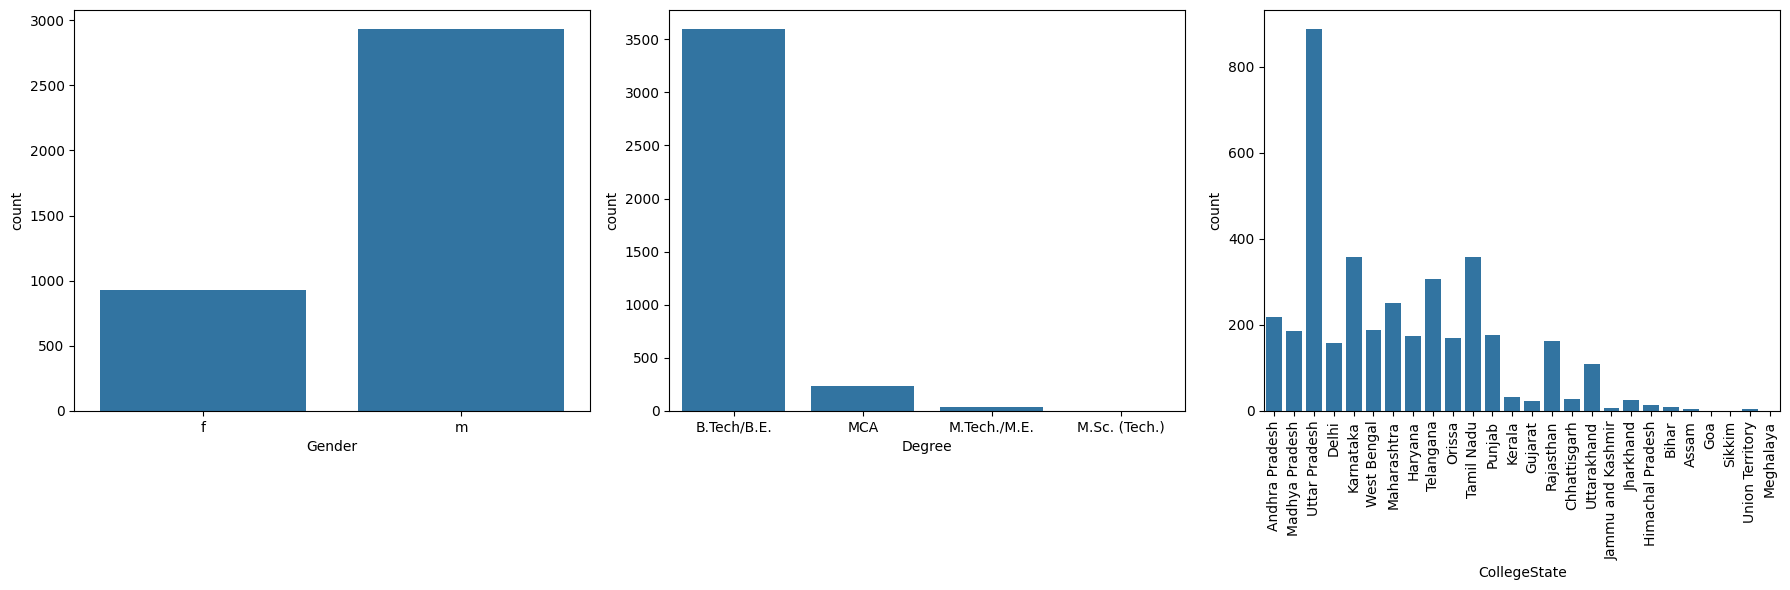

In [34]:
valid_cols = ["Gender", "Degree", "CollegeState"]
num_cols = len(valid_cols)

fig, axes = plt.subplots(1, num_cols, figsize=(18, 6))

for i, col in enumerate(valid_cols):
    sns.countplot(data=categorical_data, x=col, ax=axes[i])
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


From Above charts, i clearly tells that,
- In the dataset, the majority of employees are males,comprising nearly 3k members.
- In the dataset, the majority of graduates are from BTech  with over 3.5k graduates, while the fewest are from MSc(Tech). Therefore, based on this data, most students are opting for BTech.

-  In this dataset, most of the employees studied in Uttar Pradesh, with nearly 700 members, while Meghalaya has the fewest.




In [35]:
for i in categorical_data:
    if i not in valid_cols:
        print("*"*25,"Counts of",i,"*"*25)
        print(categorical_data[i].value_counts())
        print()

************************* Counts of Designation *************************
software engineer           525
software developer          258
system engineer             201
programmer analyst          137
systems engineer            116
                           ... 
technical analyst             1
executive engg                1
process control engineer      1
python developer              1
jr. software developer        1
Name: Designation, Length: 413, dtype: int64

************************* Counts of JobCity *************************
Bangalore           1047
Noida                354
Hyderabad            324
Pune                 283
Chennai              269
                    ... 
Nanded                 1
Dharmapuri             1
Vandavasi              1
Rohtak                 1
Asifabadbanglore       1
Name: JobCity, Length: 329, dtype: int64

************************* Counts of 10board *************************
cbse                          1687
state board                   1115
i

### **Observations of the above data**
- In the dataset, there are many employees who have been assigned the designation of software engineer, and there are considerably fewer individuals holding positions such as drafter, NOC engineer, human resources intern, senior quality assurance engineer, and junior software developer.
- In the dataset, most of the employees are working in Bangalore.
- Most of the employees completed their 12th-grade graduation in 2013.
- Most of the employees come from the specialization of electronics and communication engineering, while industrial and management engineering has the fewest employees.
- Most of the employees completed their graduation in 2009.

In [36]:
data.dtypes

Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                     object
12percentage                    float64
12board                          object
CollegeTier                      object
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityTier                  object
CollegeState                     object
GraduationYear                  float64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming             float64
ElectronicsAndSemicon             int64


### Based on the above graph, most of the employees joined the company in 2014, and then some joined in 2013.Therefore, the IT industry developed well in 2013 and 2014.


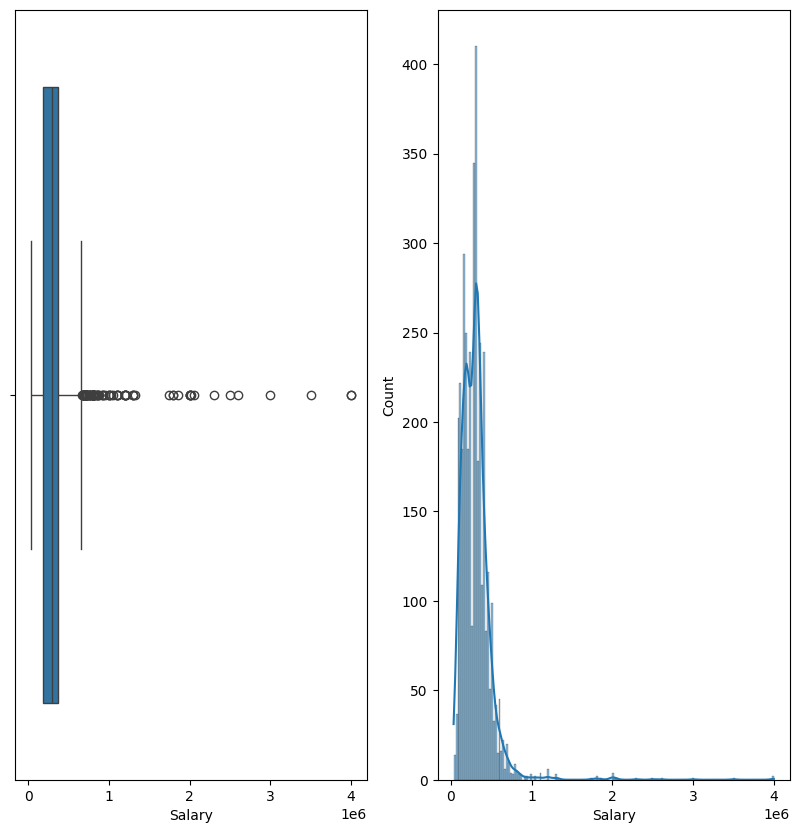

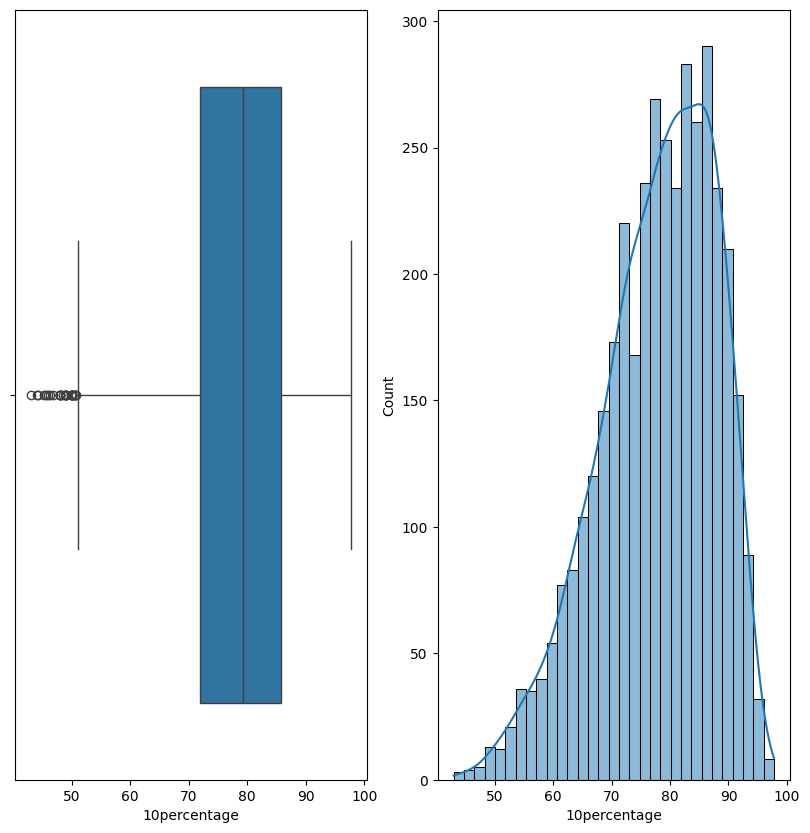

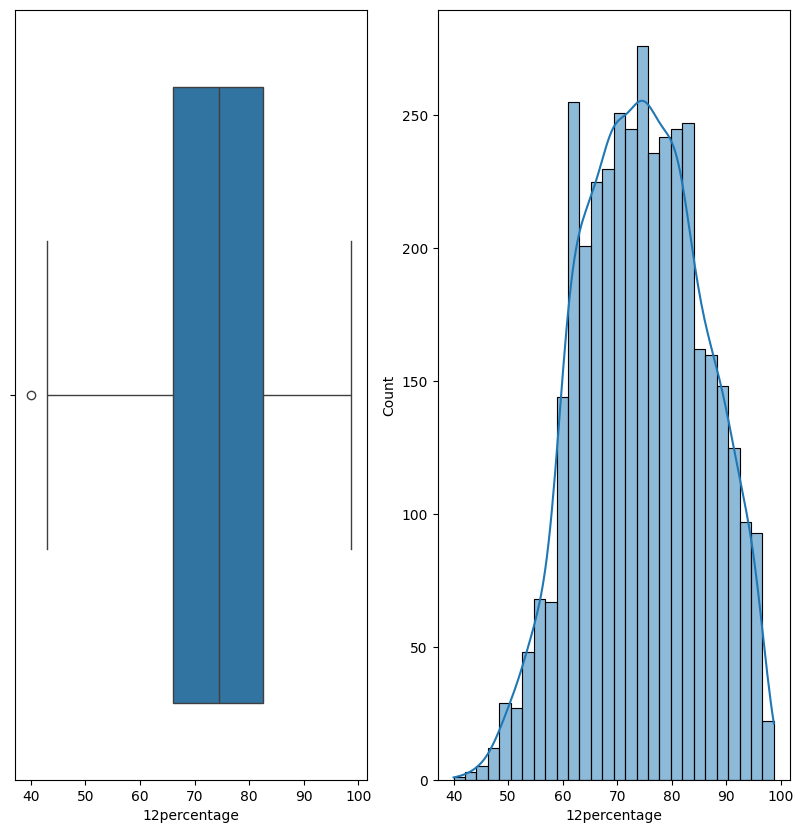

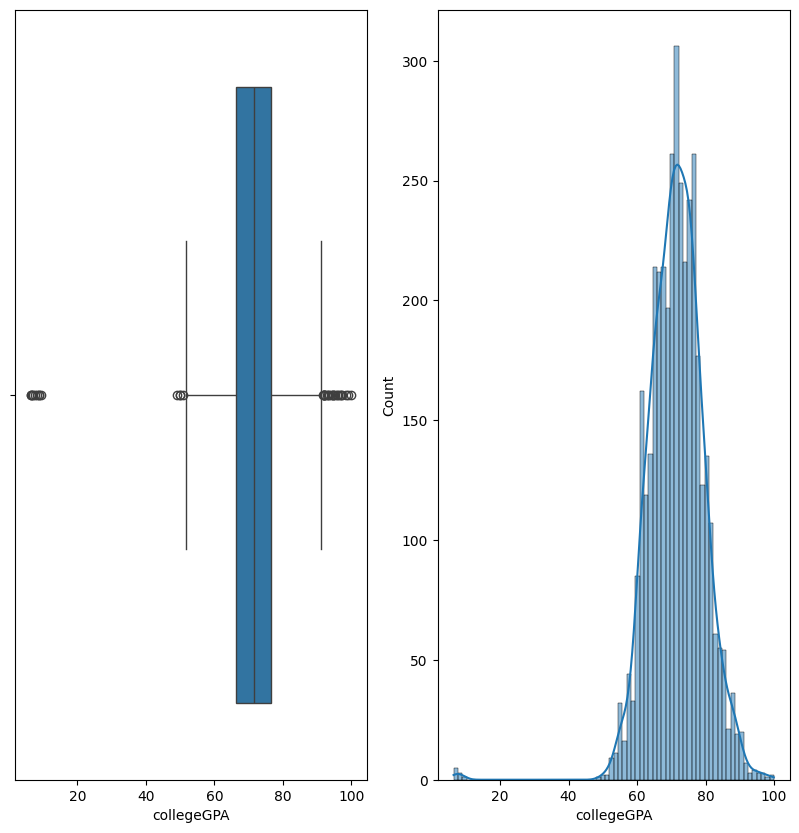

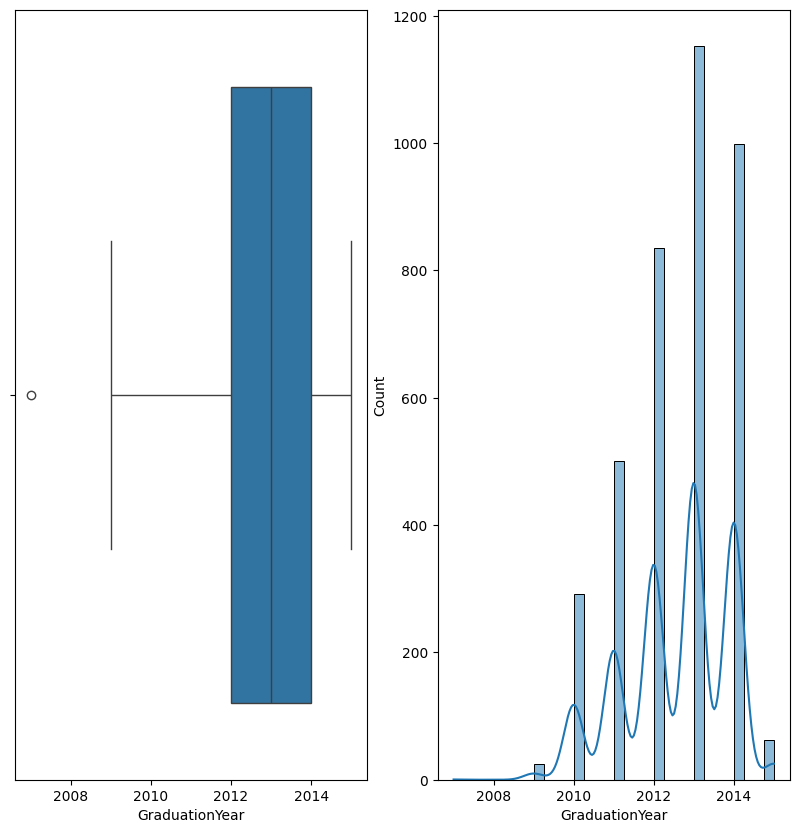

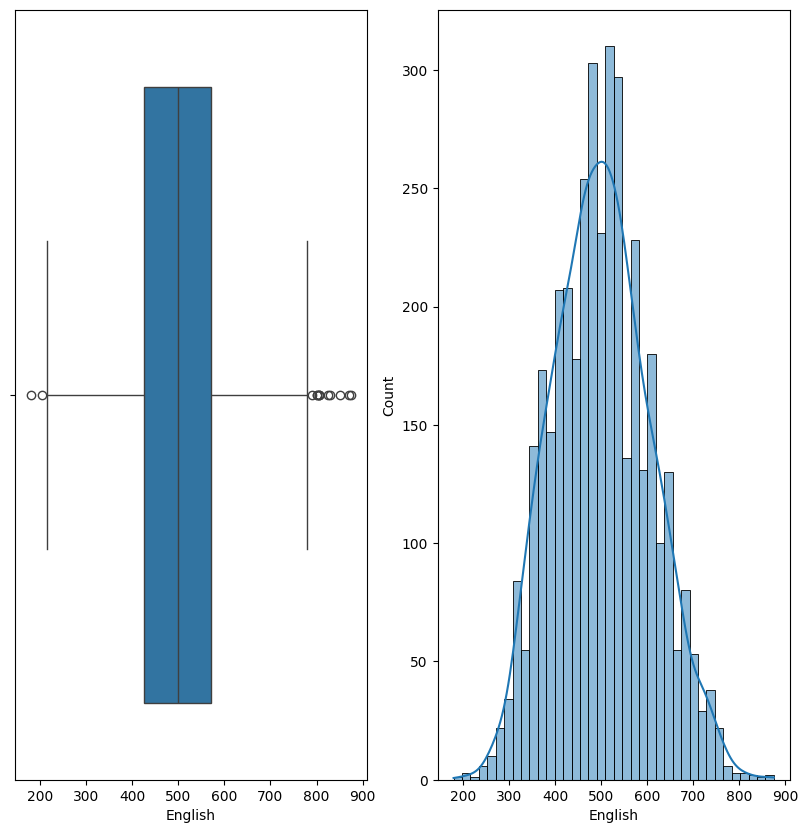

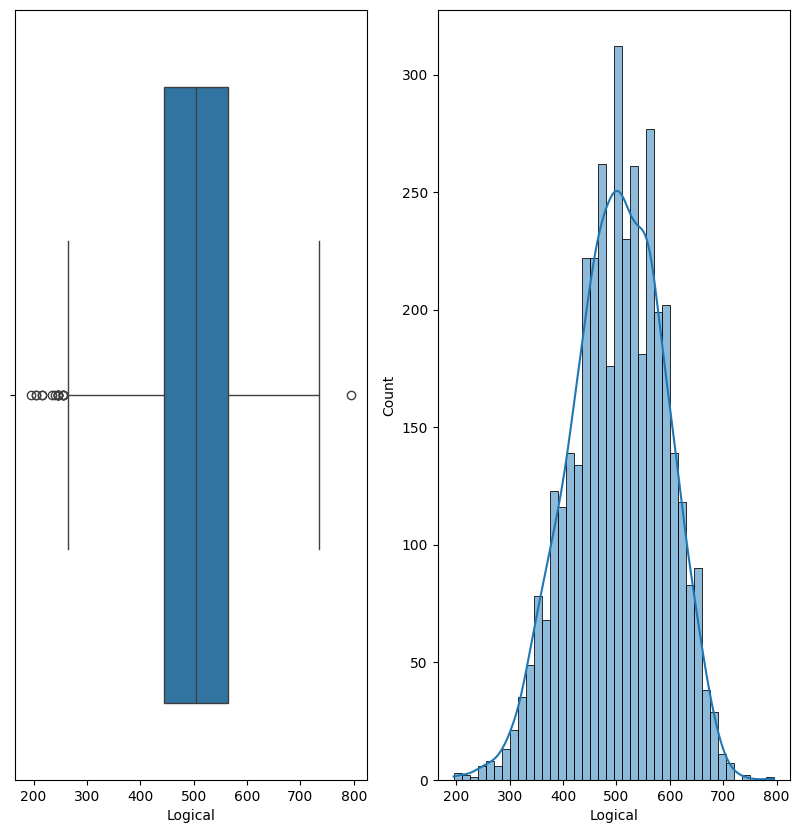

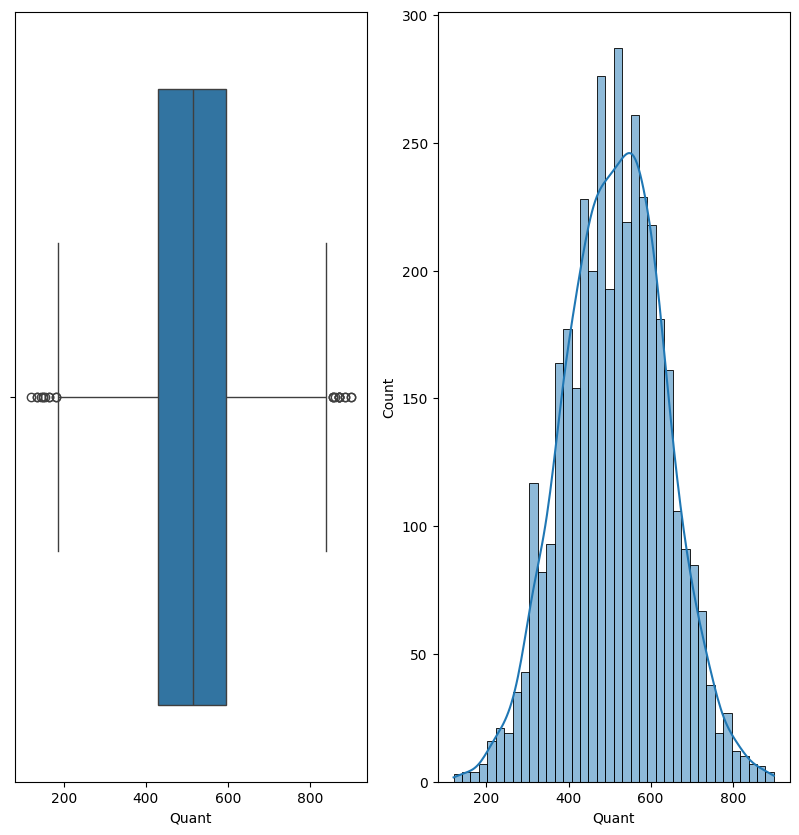

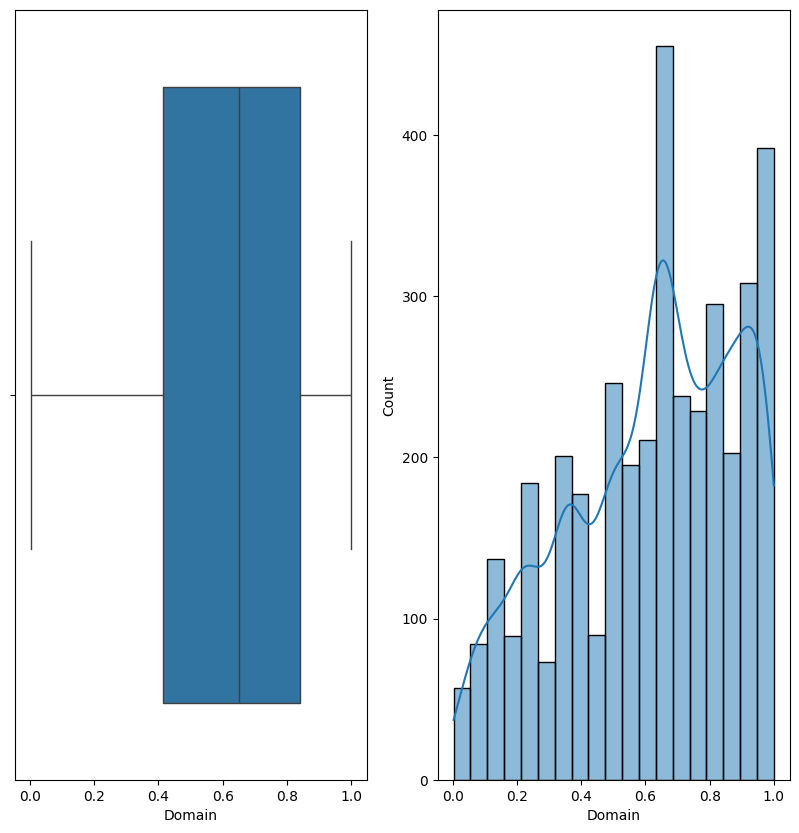

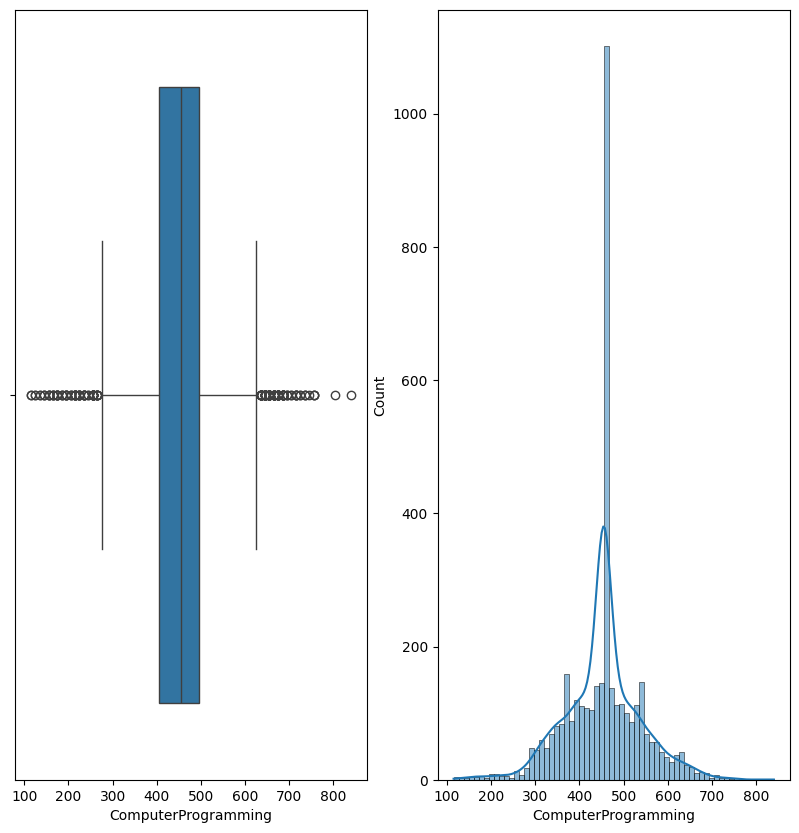

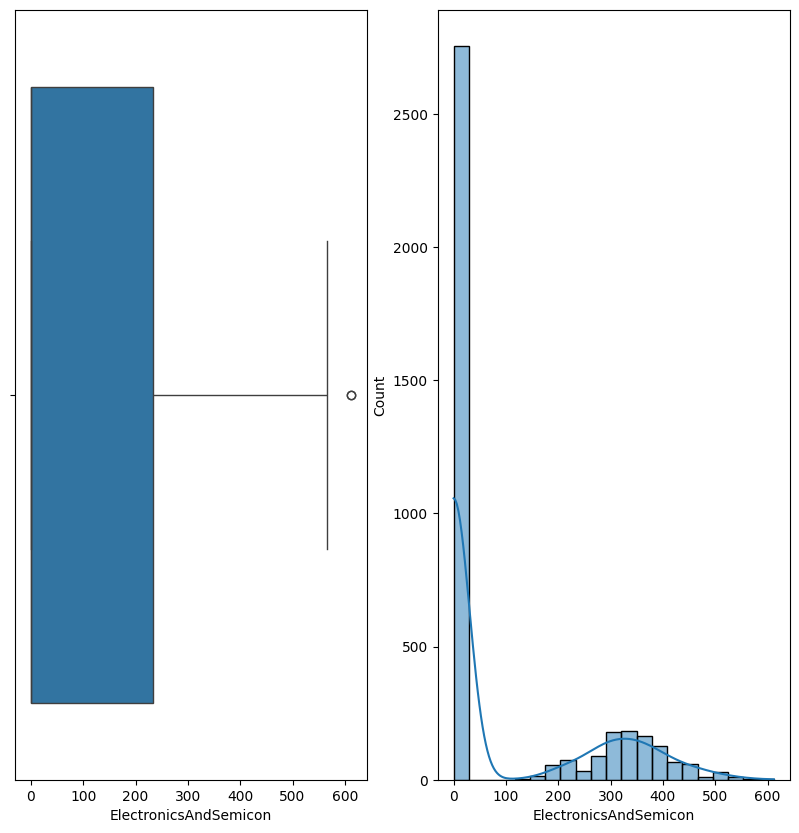

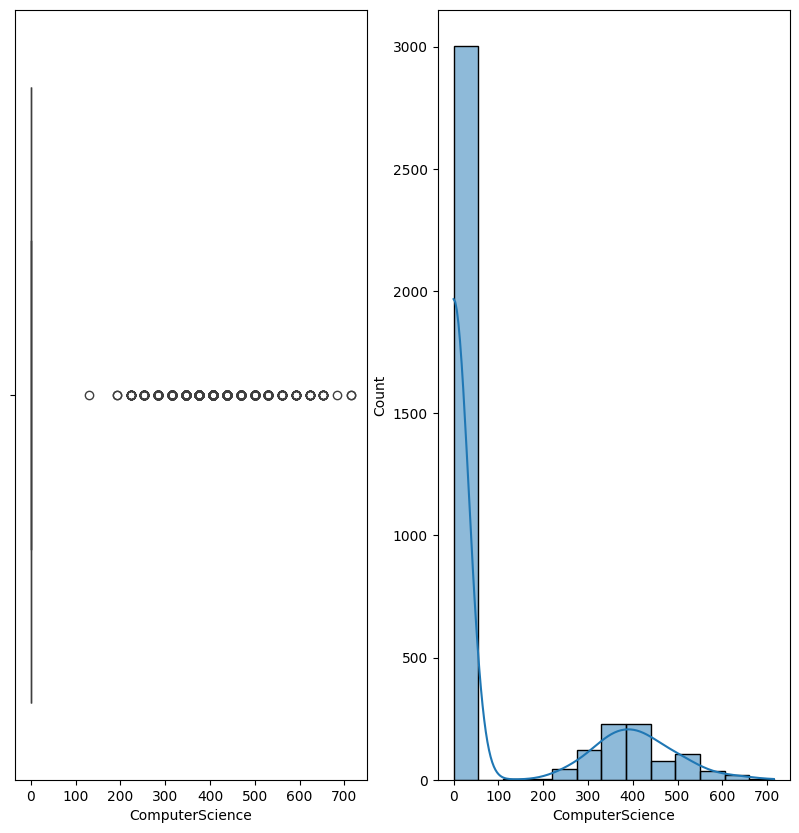

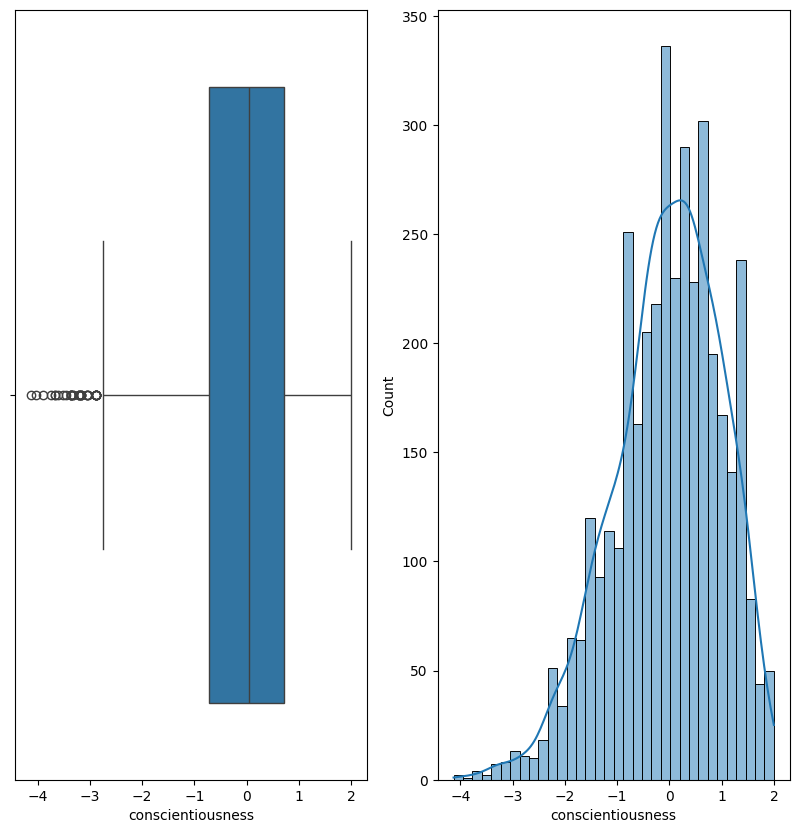

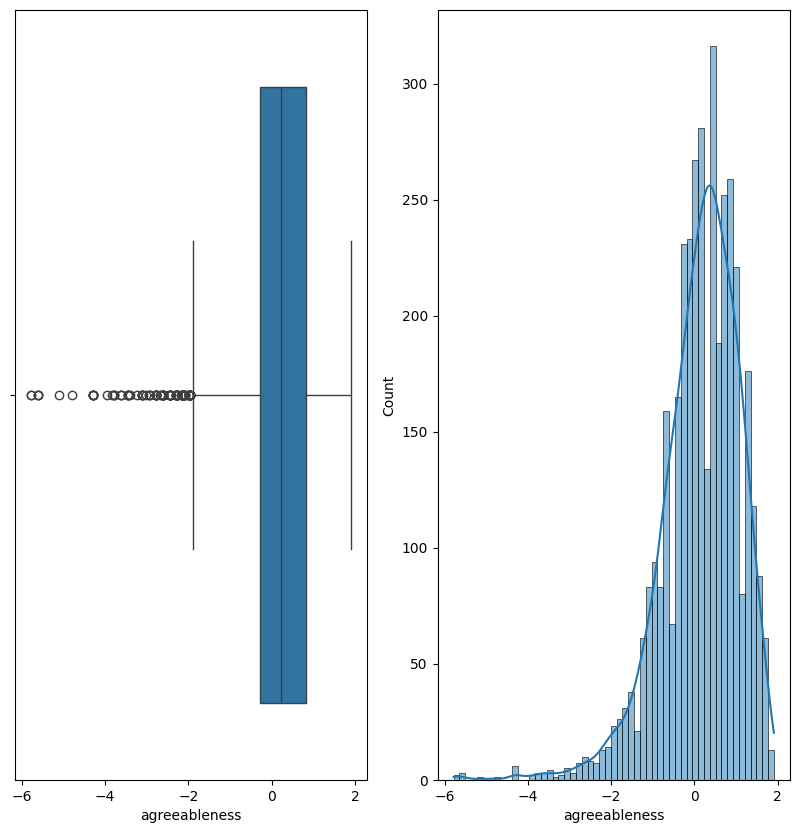

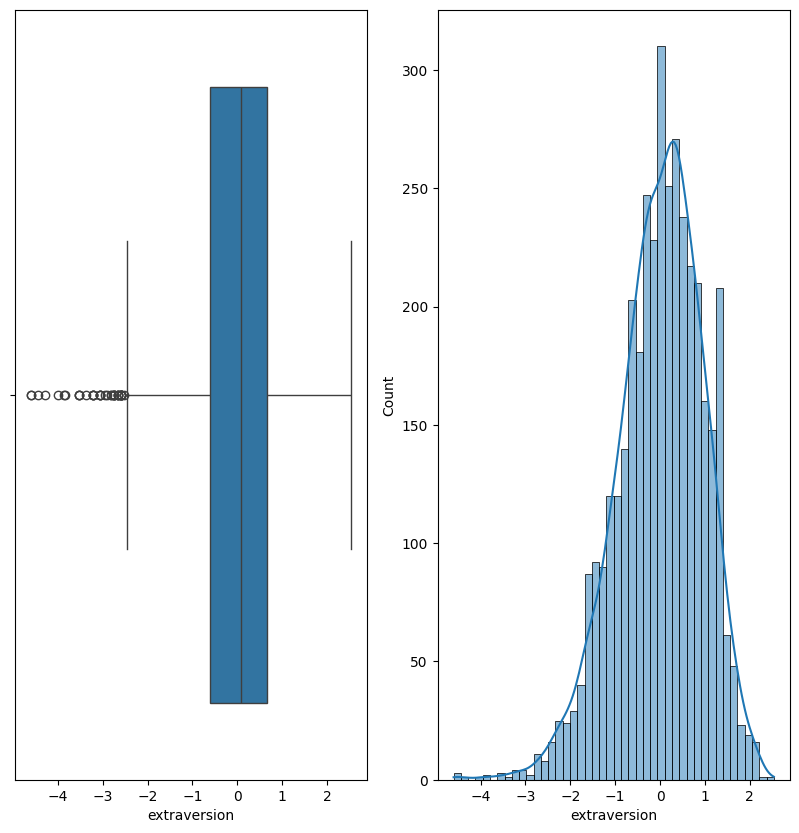

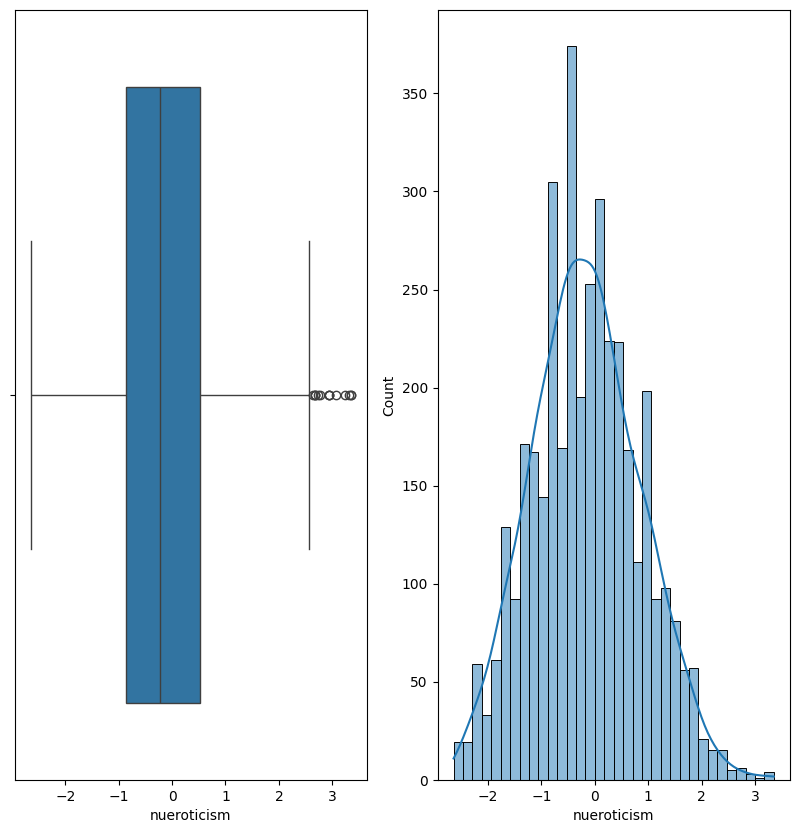

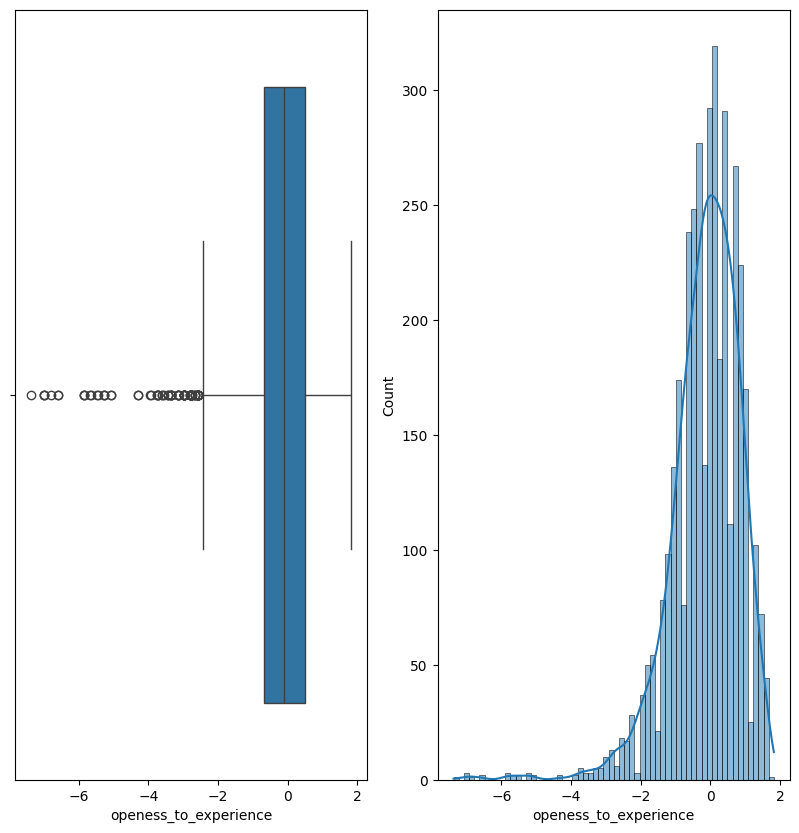

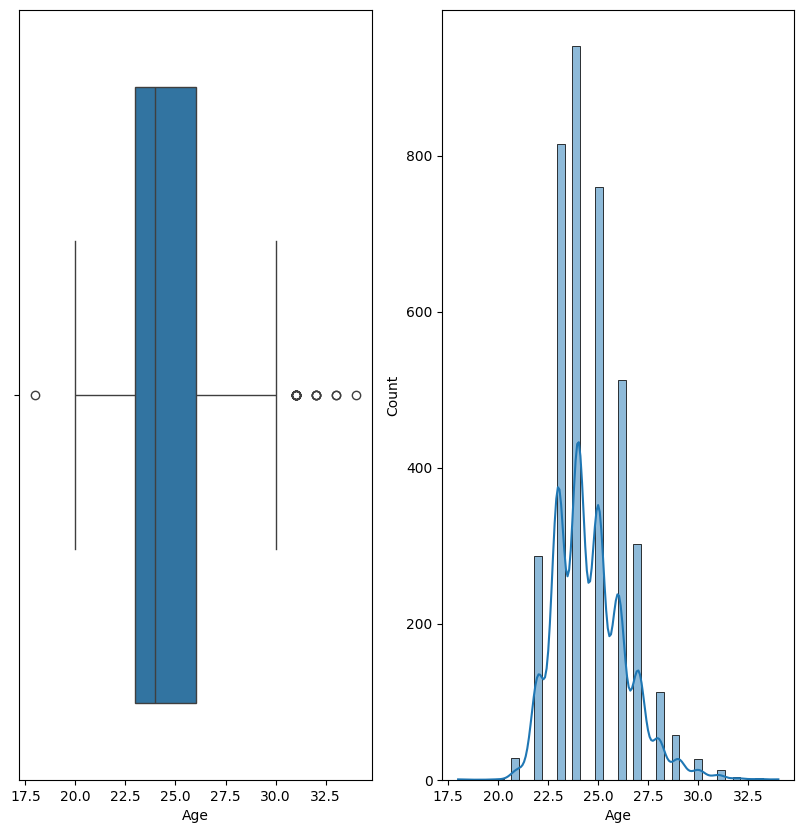

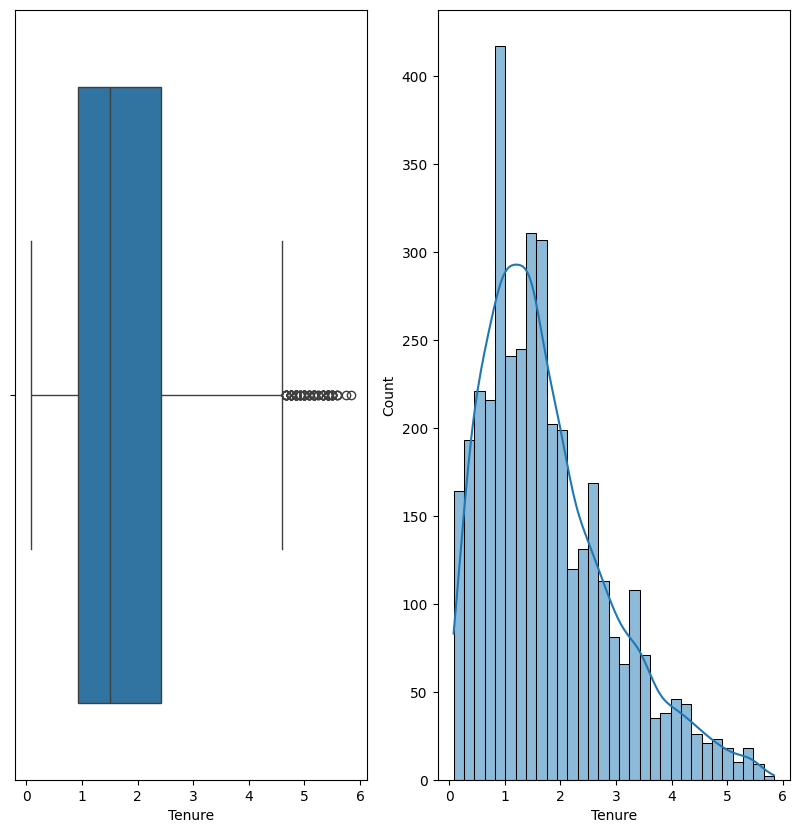

In [37]:
for i in numerical_data.columns:
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  sns.boxplot(data = numerical_data,x=i)
  plt.subplot(1,2,2)
  sns.histplot(data = numerical_data,x=i,kde=True)
  plt.show()

## **Based on the above graph**
these columns contain outliers in salary (it exhibits a right skew), 10th percentage (left skewed), college GPA (both left and right skewed), English (right skewed), logical (left skewed), Quant (both left and right skewed), computer science (right skewed), mechanical engineering (right skewed), and electrical engineering (right skewed), etc.

In [38]:
for i in numerical_data:
  q1 = numerical_data[i].quantile(0.25)
  q3 = numerical_data[i].quantile(0.75)
  IQR = q3-q1
  lower = q1 - 1.5*IQR
  upper = q3 + 1.5*IQR
  df = numerical_data[(numerical_data[i]<lower) | (numerical_data[i]>upper)]
  print(df[i])


3       1100000.0
76       800000.0
123     1200000.0
128      675000.0
166     1860000.0
          ...    
3823     775000.0
3904     850000.0
3912     730000.0
3961     700000.0
3992     800000.0
Name: Salary, Length: 103, dtype: float64
245     50.60
466     44.16
490     44.00
491     45.60
502     48.00
613     48.00
898     49.00
919     48.80
1064    49.00
1102    49.00
1169    48.50
1193    48.00
1235    50.60
1334    43.00
1838    50.00
1845    49.00
1955    45.33
1976    46.24
2037    48.00
2215    50.50
2292    50.00
2432    50.00
2655    50.66
2885    46.80
2982    50.00
3284    50.00
3425    50.00
3690    46.00
3743    49.90
Name: 10percentage, dtype: float64
3337    40.0
Name: 12percentage, dtype: float64
44      92.10
138      6.63
187     93.00
477     92.00
614     93.60
690     99.93
874     94.50
907     50.00
1029    92.30
1134    96.00
1264    97.30
1345    93.30
1419     6.85
1510    96.70
1685    94.70
1767     7.56
2151     6.95
2152    95.30
2229     8.13
2293 

In [39]:
for i in numerical_data:
  q1 = numerical_data[i].quantile(0.25)
  q3 = numerical_data[i].quantile(0.75)
  IQR = q3-q1
  lower = q1 - 1.5*IQR
  upper = q3 + 1.5*IQR
  df = numerical_data[(numerical_data[i]<lower) | (numerical_data[i]>upper)]
  print("length of outliers in",i,"is: ",len(df))

length of outliers in Salary is:  103
length of outliers in 10percentage is:  29
length of outliers in 12percentage is:  1
length of outliers in collegeGPA is:  35
length of outliers in GraduationYear is:  1
length of outliers in English is:  13
length of outliers in Logical is:  17
length of outliers in Quant is:  24
length of outliers in Domain is:  0
length of outliers in ComputerProgramming is:  193
length of outliers in ElectronicsAndSemicon is:  2
length of outliers in ComputerScience is:  863
length of outliers in conscientiousness is:  37
length of outliers in agreeableness is:  116
length of outliers in extraversion is:  40
length of outliers in nueroticism is:  14
length of outliers in openess_to_experience is:  91
length of outliers in Age is:  21
length of outliers in Tenure is:  87


### Step - 4 : Bivariate Analysis
 relationships between numerical columns


In [40]:
numerical_data.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Age', 'Tenure'],
      dtype='object')

<Axes: xlabel='Salary', ylabel='collegeGPA'>

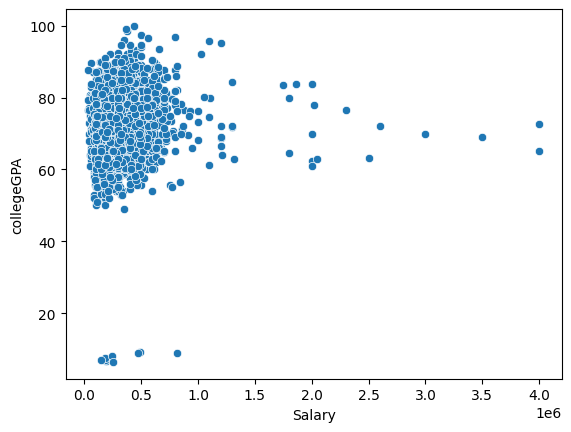

In [41]:
sns.scatterplot(x = numerical_data['Salary'] , y = numerical_data['collegeGPA'])

<Axes: xlabel='Salary', ylabel='Domain'>

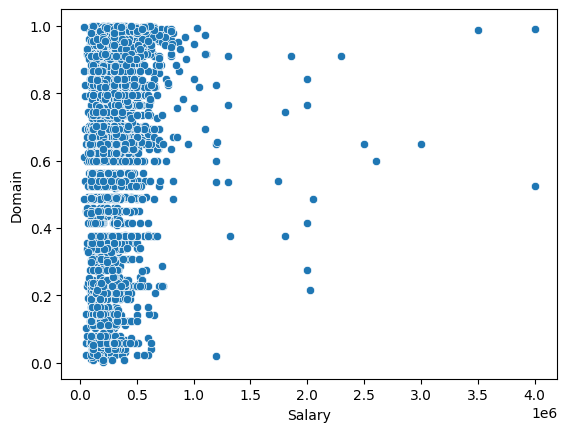

In [42]:
sns.scatterplot(x = numerical_data['Salary'] , y = numerical_data['Domain'])

In [43]:
numerical_data.corr()

,Salary,10percentage,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Tenure
Salary,1.000000,0.175224,0.167770,0.136631,-0.213144,0.184239,0.183859,0.234587,0.173544,0.168980,0.001905,-0.107232,-0.061732,0.059889,-0.010020,-0.056468,-0.008112,0.160658,0.411461
10percentage,0.175224,1.000000,0.641345,0.320391,0.105584,0.347872,0.315751,0.314624,0.147881,0.158863,0.083642,-0.014766,0.066608,0.135012,-0.007440,-0.131146,0.034008,-0.248005,0.091335
12percentage,0.167770,0.641345,1.000000,0.354089,0.069410,0.211780,0.243248,0.310512,0.158163,0.142877,0.117299,-0.040702,0.060286,0.106663,-0.006685,-0.095618,0.003464,-0.266585,0.103741
collegeGPA,0.136631,0.320391,0.354089,1.000000,0.100937,0.109120,0.197752,0.219312,0.174618,0.197195,0.033723,0.006851,0.069648,0.071416,-0.032677,-0.070532,0.027597,-0.115302,0.076902
GraduationYear,-0.213144,0.105584,0.069410,0.100937,1.000000,0.127472,0.104813,0.001162,-0.005886,0.049427,-0.082964,0.393749,0.114977,0.024186,0.081408,-0.078639,-0.019031,-0.767602,-0.603696
English,0.184239,0.347872,0.211780,0.109120,0.127472,1.000000,0.444532,0.373277,0.227171,0.275398,0.016368,0.062641,0.031956,0.194302,0.014182,-0.155640,0.064911,-0.107060,0.012310
Logical,0.183859,0.315751,0.243248,0.197752,0.104813,0.444532,1.000000,0.497034,0.315154,0.387410,-0.010884,0.052200,0.025827,0.165194,-0.007517,-0.178686,0.045618,-0.099692,0.033097
Quant,0.234587,0.314624,0.310512,0.219312,0.001162,0.373277,0.497034,1.000000,0.336615,0.371917,0.105509,-0.037268,-0.004735,0.104745,-0.026927,-0.133662,0.022349,-0.031312,0.126824
Domain,0.173544,0.147881,0.158163,0.174618,-0.005886,0.227171,0.315154,0.336615,1.000000,0.501109,-0.035847,0.070270,-0.006358,0.096739,-0.025143,-0.102353,0.019849,0.023685,0.102596
ComputerProgramming,0.168980,0.158863,0.142877,0.197195,0.049427,0.275398,0.387410,0.371917,0.501109,1.000000,-0.195865,0.130710,-0.014567,0.106912,-0.029389,-0.123912,0.022882,-0.008138,0.089438


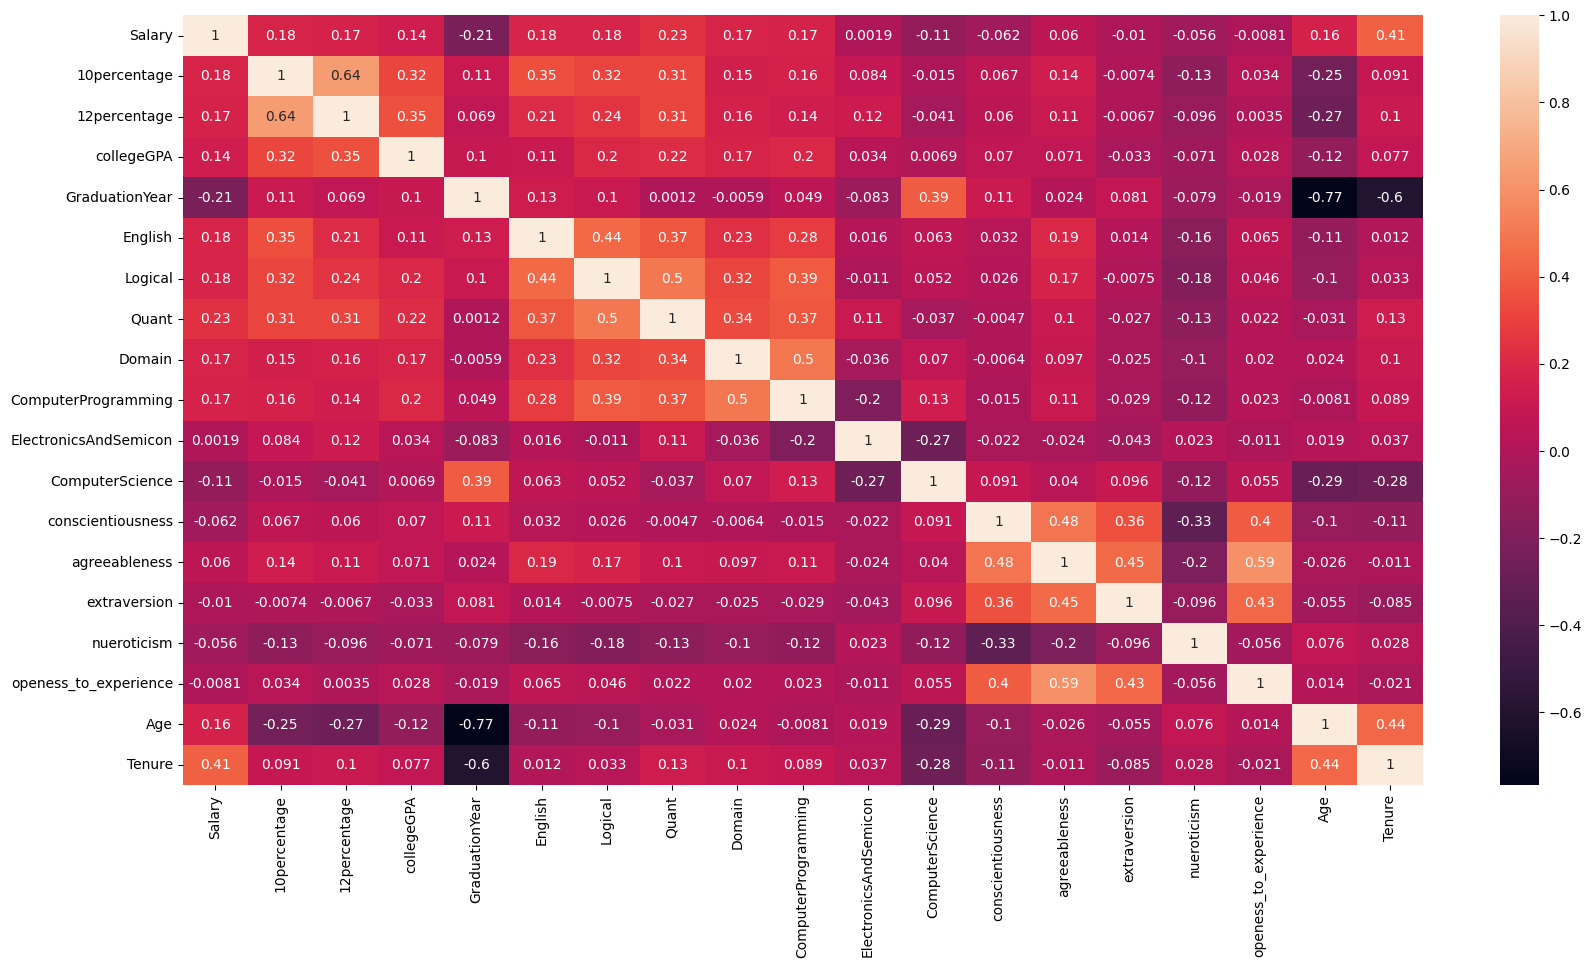

In [44]:
plt.figure(figsize = (20,10))
sns.heatmap(numerical_data.corr(),annot = True)
plt.show()

- Based on the first graph, it appears that for employees with college GPAs ranging from 6.0 to 9.0, the salary range is approximately between 2 to 5 lakhs. However, there are some employees whose salary falls between 5 to 10 lakhs.

- Based on the second graph, for most employees who have a positive domain, the salary ranges between 1 to 6 lakhs. If the domain has a negative value, there are significantly fewer job opportunities.

- Based on the first graph, there is no relationship between each column.all numeric columns are independent columns.

In [45]:
categorical_data.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12graduation',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier',
       'CollegeState'],
      dtype='object')

In [46]:
numerical_data.columns

Index(['Salary', '10percentage', '12percentage', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Age', 'Tenure'],
      dtype='object')

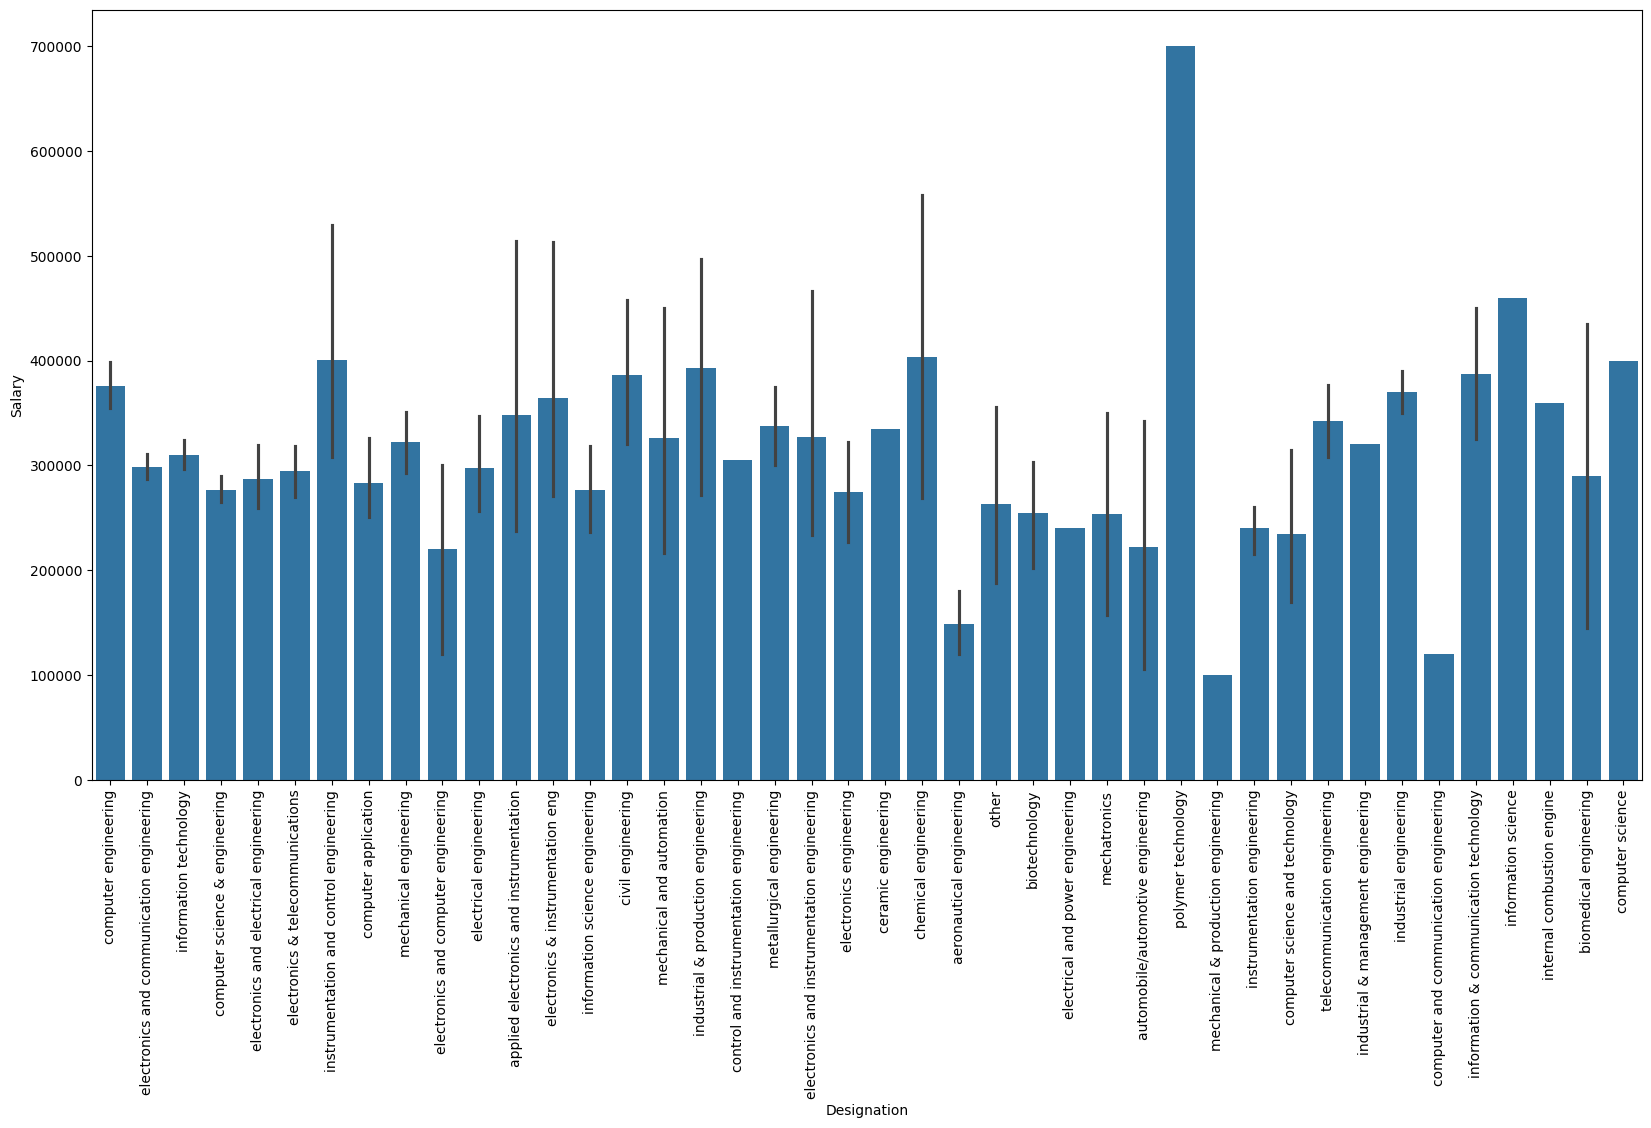

In [47]:
plt.figure(figsize = (20,10))
sns.barplot(x = categorical_data['Specialization'], y = numerical_data['Salary'])
plt.xlabel("Designation")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()


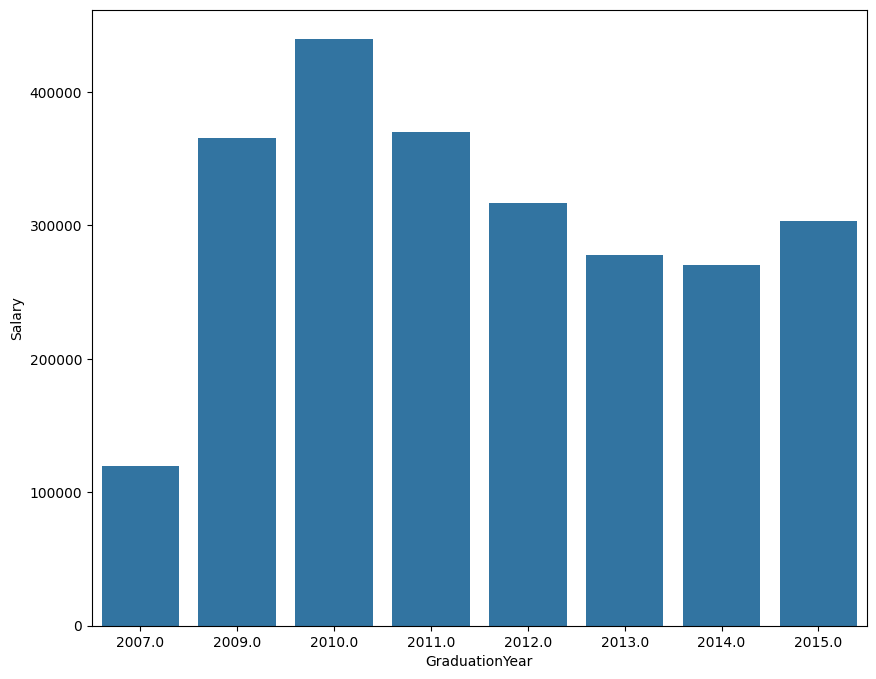

In [48]:
plt.figure(figsize = (10,8))
sample = data.groupby("GraduationYear")[["Salary"]].mean().reset_index()
sns.barplot(x = sample['GraduationYear'], y = sample['Salary'])
plt.show()

- The first graph indicates that it displays the salary of each designation. When comparing the salary of the Polymer Technology designation with the remaining roles in the graph, it appears significantly higher. In the second position, there is Computer Networking, and the lowest salaries are for the Electronic designation.

- The second graph displays salaries according to graduation year. In this graph, salaries for those who passed out in 2010 are significantly higher when compared to the remaining years. The least salaries are for those who graduated in the year 2017.

###  

In [49]:
categorical_data.columns

Index(['Designation', 'JobCity', 'Gender', '10board', '12graduation',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'CollegeCityTier',
       'CollegeState'],
      dtype='object')

<Figure size 3000x1000 with 0 Axes>

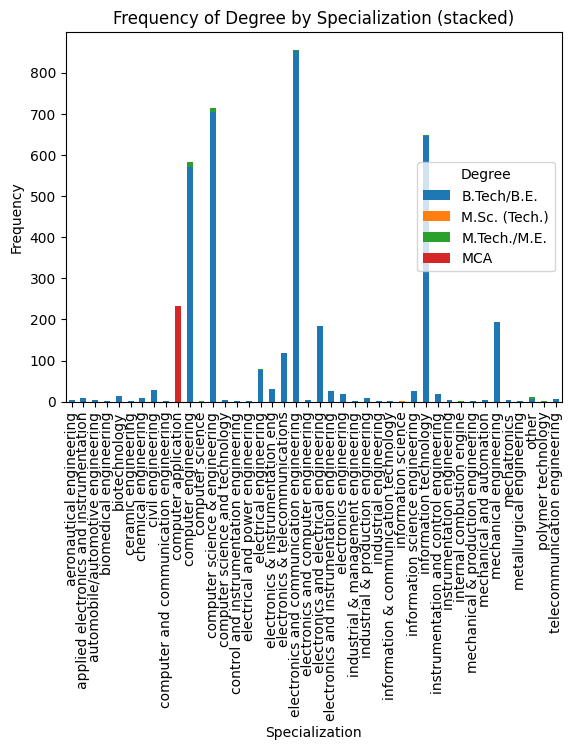

In [50]:
sam = pd.crosstab(columns = categorical_data['Degree'],index = categorical_data['Specialization'])
plt.figure(figsize = (30,10))
sam.plot(kind='bar', stacked=True)
plt.xlabel('Specialization')
plt.ylabel('Frequency')
plt.title('Frequency of Degree by Specialization (stacked)')
plt.show()


<Figure size 3000x1000 with 0 Axes>

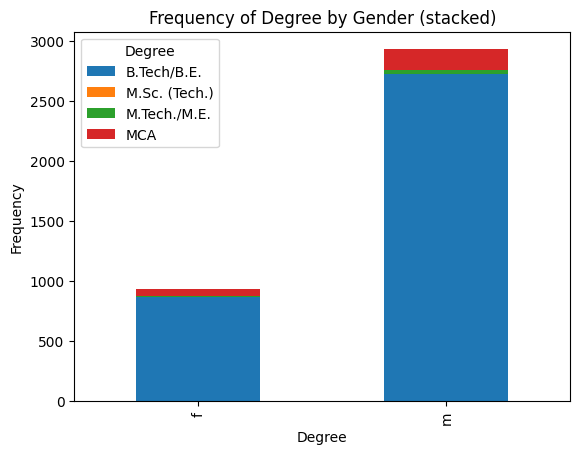

In [51]:
sam = pd.crosstab(columns = categorical_data['Degree'],index = categorical_data['Gender'])
plt.figure(figsize = (30,10))
sam.plot(kind='bar', stacked=True)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Frequency of Degree by Gender (stacked)')
plt.show()


- The first graph illustrates the frequency distribution of degrees across various specializations. Each bar represents a degree category, and the height of the bars indicates the frequency of each degree within the respective specialization. The graph is stacked to allow for a clear comparison of degree frequencies across different specializations. The x-axis represents the different degrees, the y-axis represents the frequency, and the title highlights the visualization's purpose: "Frequency of Degree by Specialization (stacked).

- The second graph illustrates the frequency distribution of degrees by gender, with data derived from a dataset. Each bar represents a degree category, stacked to indicate the distribution across genders. The x-axis denotes the degree, while the y-axis represents the frequency. This visualization offers insights into the gender distribution across various degrees.

### Step - 5 : Research Questions

- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

- Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [52]:
dataframe['Designation'] = dataframe['Designation'].replace(['programmer analyst trainee', 'programmer analyst'], 'programmer analyst')

dataframe['Designation'] = dataframe['Designation'].replace(['software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'], 'software engineer')

In [53]:
df3 = dataframe[(dataframe["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (dataframe["Specialization"].isin(["computer science & engineering", "computer engineering"]))]


In [54]:


result = df3.groupby(['Designation'])['Salary'].agg(['mean', 'median', 'max', 'min'])

result

,mean,median,max,min
Designation,,,,
associate engineer,281666.666667,315000.0,350000.0,180000.0
programmer analyst,345267.857143,335000.0,600000.0,180000.0
software engineer,356820.000000,330000.0,1500000.0,85000.0


- Overall, this code segment aims to analyze the salaries of individuals with specific designations within the field of computer science & engineering, specifically focusing on entries where the Date of Joining aligns with the Graduation Year.

- The aggregate statistics(mean salary , meadian salary) provide insights into the salary distributions for different designations.

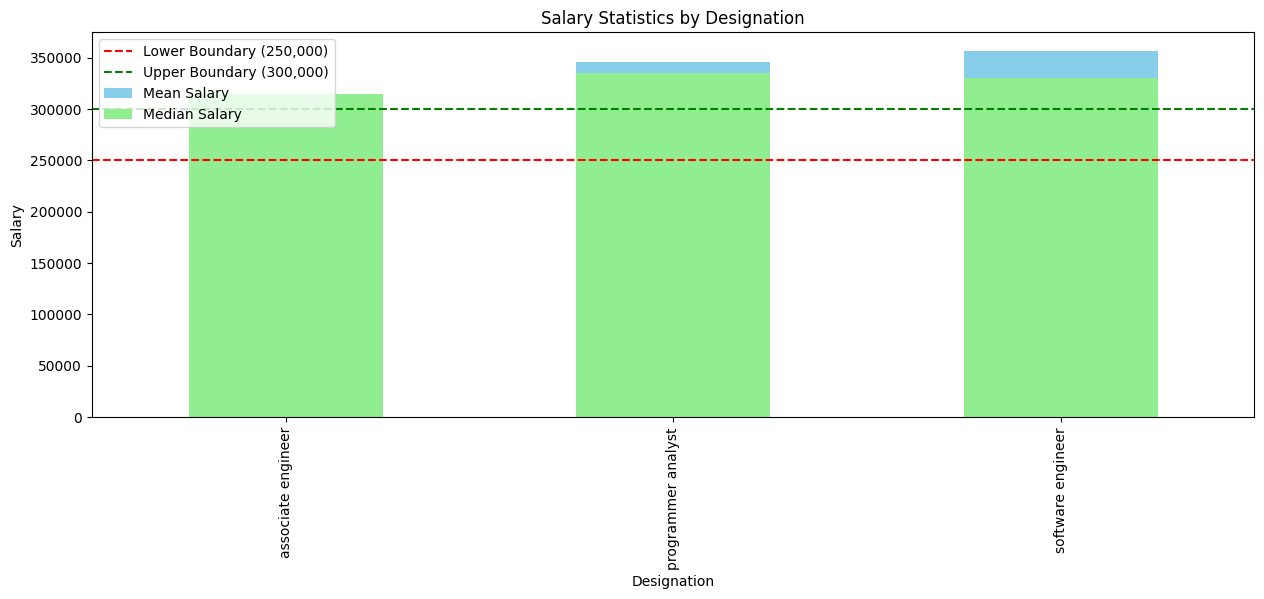

In [55]:
# Create a bar plot for mean and median salary

plt.figure(figsize = (15, 5))
result['mean'].plot(kind='bar', color='skyblue', label='Mean Salary')
result['median'].plot(kind='bar', color='lightgreen', label='Median Salary')

#Add horizontal lines for the boundary of 250,000-300,000

plt.axhline(y=250000, color='red', linestyle='--', label='Lower Boundary (250,000)')
plt.axhline(y=300000, color='green', linestyle='--', label='Upper Boundary (300,000)')

#Customize the plot

plt.title('Salary Statistics by Designation')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.legend()
plt.show()

- bar plot illustrating the mean and median salaries for different designations.Two sets of bars are plotted: one representing the mean salary (colored sky blue) and the other representing the median salary (colored light green) for each designation. Additionally, horizontal dashed lines are added to denote the lower and upper boundaries set at 2,50,000 and 3,00,000 respectively.

- This visualization helps in comparing the mean and median salaries across different designations and visually identifies whether salaries fall within the specified boundaries.

**The actual salaries are significantly different from the reported range, it would cast doubt on the claim.**

### Null Hypothesis (H0): There is no relationship between gender and specialization.

### Alternative Hypothesis (H1): There is a relationship between gender and specialization.

In [57]:
gen_specialization = dataframe[['Gender','Specialization']]

# Create a contingency_table for Gender and Specialization columns

chi2_crosstab = pd.crosstab(index= gen_specialization['Gender'], columns= gen_specialization['Specialization'])

#Apply Chi-square testing of independence

chi2, p_value, dof, expected_freq = chi2_contingency(chi2_crosstab)

print(np.round(p_value,4))


0.0


The p-value is below a certain significance level(0.05), I reject the null hypothesis and conclude that there is an evidence of a relationship. Finally I conclude that there is relationship between a Gender and Specialization.

## Conclusion
### Data Understanding:

The dataset encompasses the employment outcomes of engineering graduates, focusing on target variable Salary.
Additionally, it includes standardized scores in three distinct areas: cognitive skills, technical skills, and personality skills.

### Data Manipulation:

Upon initial observation, the dataset consists of 4000 rows and 40 columns.
The dataset exhibits numerous duplicate values, necessitating data manipulation.
Initially, we remove redundant rows and columns.
Subsequently, we assess for the presence of any missing values (NaN).
Following data cleaning, we proceed with visualization.
Data Visualization:

### Univariate Analysis:

Univariate analysis encompasses various plots, including Cumulativee Distribution Functions (CDF), Histograms, Box Plots, and Summary Plots.
These visualizations illustrate probability and frequency distributions.

### Bivariate Analysis:

Bivariate analysis comprises Scatterplots, Barplots, Crosstabs, Pivot tables, pie charts.
This analysis helps in comparing percentages across different variables.
Additionally, it aids in identifying outliers, as observed through Boxplots.
For instance, Countplots assist in identifying outliers within categorical variables, such as Job City, by highlighting the cities with higher employee counts.